In [1]:
%matplotlib notebook
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

In [3]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_df=pd.DataFrame(iris['data'])
iris_df.columns=iris['feature_names']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df['target']=iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [8]:
features=iris.feature_names
X=iris_df[features]
Y=iris_df['target']
print(X.head(),Y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [10]:
transform_X=preprocessing.StandardScaler().fit(X).transform(X)
transform_X=pd.DataFrame(transform_X)
transform_X.columns=iris['feature_names']
transform_X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(transform_X,Y,test_size=0.1,random_state=2)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,0.795669,-0.592373,0.478571,0.395774
41,-1.627688,-1.743357,-1.397064,-1.183812
96,-0.173674,-0.362176,0.251221,0.132510
144,1.038005,0.558611,1.103783,1.712096
89,-0.416010,-1.282963,0.137547,0.132510
...,...,...,...,...
75,0.916837,-0.131979,0.364896,0.264142
43,-1.021849,1.019004,-1.226552,-0.788916
22,-1.506521,1.249201,-1.567576,-1.315444
72,0.553333,-1.282963,0.649083,0.395774


<IPython.core.display.Javascript object>


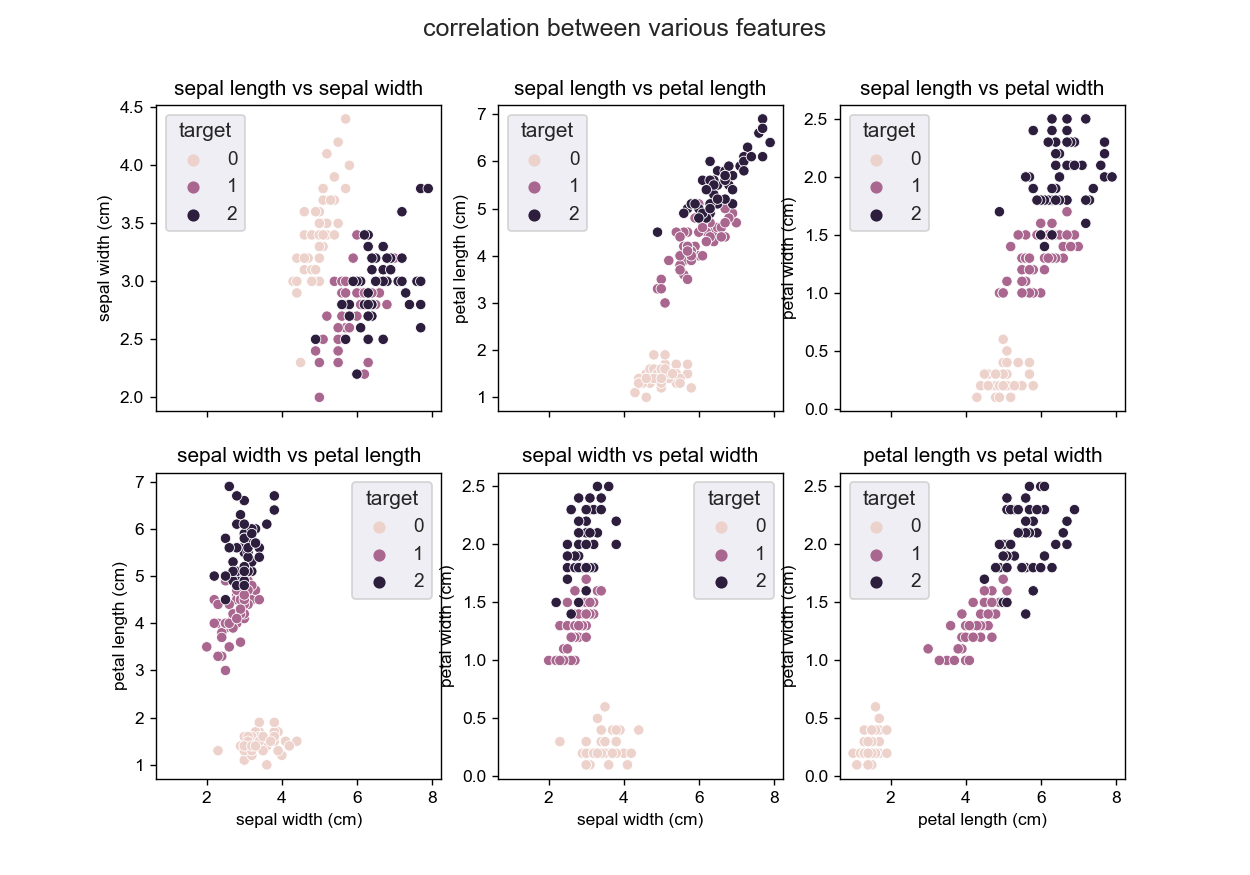

Text(0.5, 1.0, 'petal length vs petal width')

In [12]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(10,7))
sns.set()
fig.suptitle('correlation between various features')
axes[0,0].set_title('sepal length vs sepal width')
axes[0,1].set_title('sepal length vs petal length')
axes[0,2].set_title('sepal length vs petal width')
axes[1,0].set_title('sepal width vs petal length')
axes[1,1].set_title('sepal width vs petal width')
axes[1,2].set_title('petal length vs petal width')


### from the plot we can see versicolor and virginica has some overlapping

In [13]:
def plot_(x,y,i,j):
    sns.scatterplot(ax=ax[i,j],x=x,y=y,hue=iris_df['target'])

In [14]:
sns.scatterplot(ax=axes[0,0],x=X['sepal length (cm)'],y=X['sepal width (cm)'],hue=iris_df['target'])


<AxesSubplot:title={'center':'sepal length vs sepal width'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

In [15]:
sns.scatterplot(ax=axes[0,1],x=X['sepal length (cm)'],y=X['petal length (cm)'],hue=iris_df['target'])
sns.scatterplot(ax=axes[0,2],x=X['sepal length (cm)'],y=X['petal width (cm)'],hue=iris_df['target'])
sns.scatterplot(ax=axes[1,0],x=X['sepal width (cm)'],y=X['petal length (cm)'],hue=iris_df['target'])
sns.scatterplot(ax=axes[1,1],x=X['sepal width (cm)'],y=X['petal width (cm)'],hue=iris_df['target'])
sns.scatterplot(ax=axes[1,2],x=X['petal length (cm)'],y=X['petal width (cm)'],hue=iris_df['target'])


<AxesSubplot:title={'center':'petal length vs petal width'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

# Linear regression

In [16]:
c1_train_x,c1_train_y=X_train[['sepal length (cm)']],X_train[['sepal width (cm)']]
c2_train_y,c2_train_x=X_train[['sepal length (cm)']],X_train[['sepal width (cm)']]
c3_train_x,c3_train_y=X_train[['sepal length (cm)']],X_train[['petal width (cm)']]
c4_train_y,c4_train_x=X_train[['sepal length (cm)']],X_train[['petal width (cm)']]
c5_train_x,c5_train_y=X_train[['sepal length (cm)']],X_train[['petal length (cm)']]
c6_train_y,c6_train_x=X_train[['sepal length (cm)']],X_train[['petal length (cm)']]
c7_train_x,c7_train_y=X_train[['petal length (cm)']],X_train[['petal width (cm)']]
c8_train_y,c8_train_x=X_train[['petal length (cm)']],X_train[['petal width (cm)']]
c9_train_x,c9_train_y=X_train[['petal length (cm)']],X_train[['sepal width (cm)']]
c10_train_y,c10_train_x=X_train[['petal length (cm)']],X_train[['sepal width (cm)']]
c11_train_x,c11_train_y=X_train[['petal width (cm)']],X_train[['sepal width (cm)']]
c12_train_y,c12_train_x=X_train[['petal width (cm)']],X_train[['sepal width (cm)']]

In [55]:

import sys
import io

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss
  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, n,*args, **kwargs):
    sys.stdout = self.old_stdout
    self.n=n
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True


In [77]:
from sklearn.model_selection import GridSearchCV

In [84]:
param={'alpha':[.001,.01,.1,1,10,100],'penalty':['l2', 'l1','elasticnet']}

In [85]:
SGD=SGDRegressor()
sgd=GridSearchCV(SGD,param)

In [86]:
sgd.fit(c1_train_x,c1_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [94]:
print(sgd.best_estimator_)
print(sgd.best_score_)
print(sgd.best_params_)

SGDRegressor(alpha=100, penalty='elasticnet')
-0.06651084971094981
{'alpha': 100, 'penalty': 'elasticnet'}


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


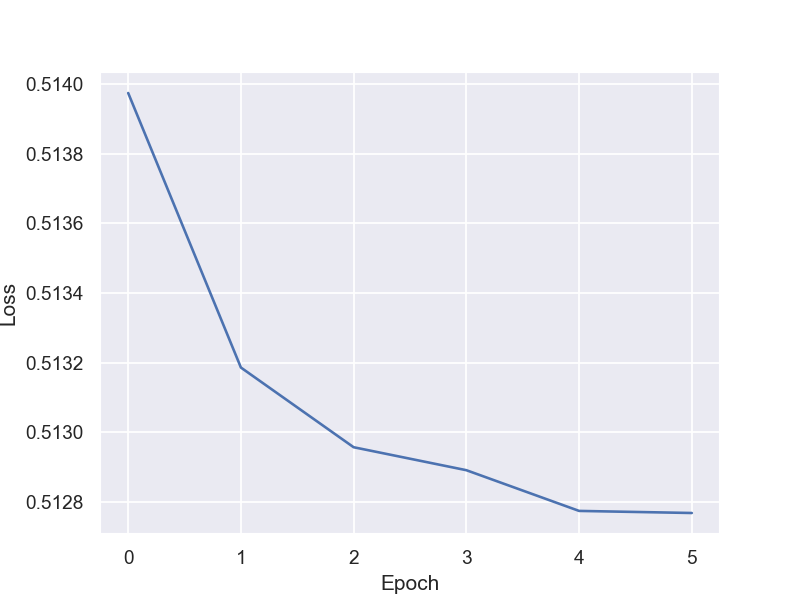

=============== Loss Array ===============
[0.513975 0.513186 0.512957 0.512891 0.512774 0.512768]


In [95]:
c1=SGDRegressor(alpha=100, penalty='elasticnet',max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c1_=c1.fit(c1_train_x,c1_train_y)


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


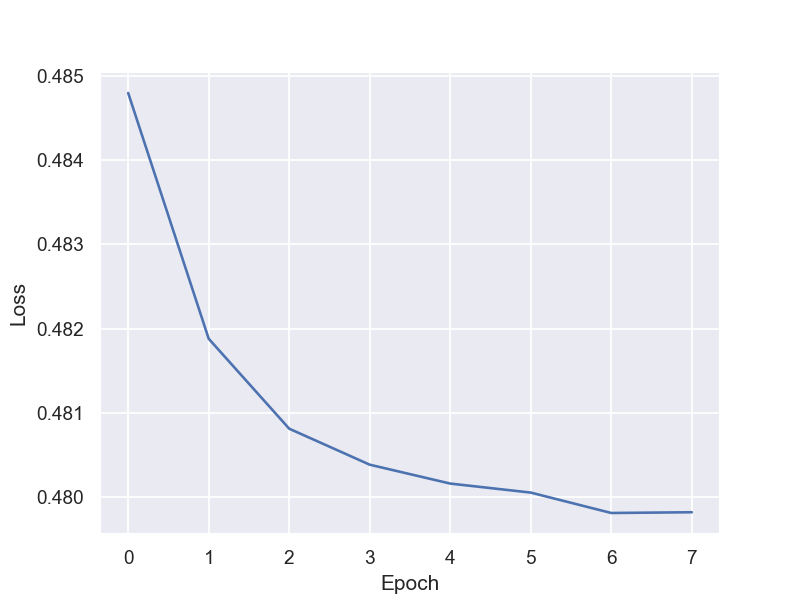

=============== Loss Array ===============
[0.484794 0.481879 0.480812 0.480385 0.480161 0.480054 0.479812 0.479821]


In [57]:
c2=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c2_=c2.fit(c2_train_x,c2_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


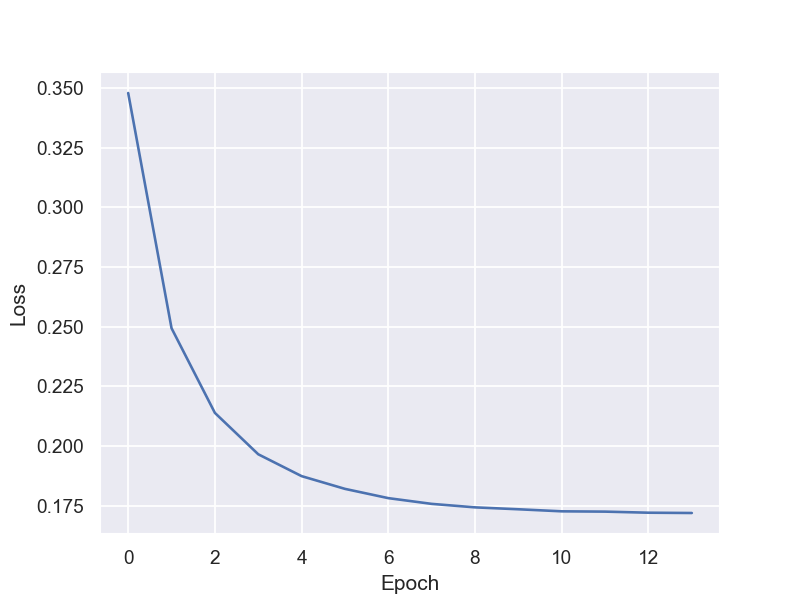

=============== Loss Array ===============
[0.347834 0.249381 0.213931 0.196612 0.187461 0.18213  0.178249 0.175848
 0.174388 0.173589 0.17273  0.172604 0.172151 0.172029]


In [58]:
c3=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c3_=c3.fit(c3_train_x,c3_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


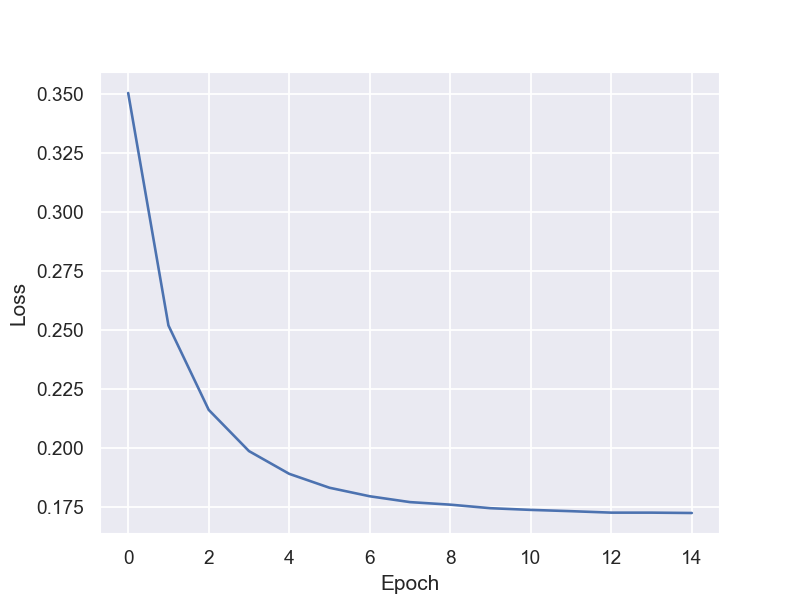

=============== Loss Array ===============
[0.350571 0.252083 0.216314 0.198844 0.189201 0.183307 0.179695 0.177219
 0.17614  0.174635 0.173924 0.173379 0.172758 0.172756 0.172606]


In [59]:
c4=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c4_=c4.fit(c4_train_x,c4_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


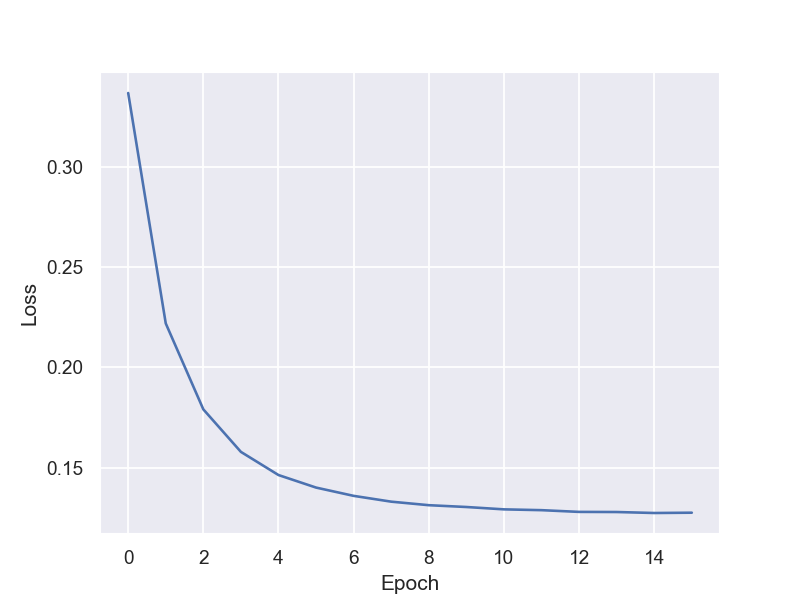

=============== Loss Array ===============
[0.336623 0.221833 0.17901  0.157832 0.146295 0.140049 0.135923 0.13303
 0.131273 0.13037  0.129196 0.128795 0.127934 0.127873 0.127383 0.127532]


In [60]:
c5=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c5_=c5.fit(c5_train_x,c5_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


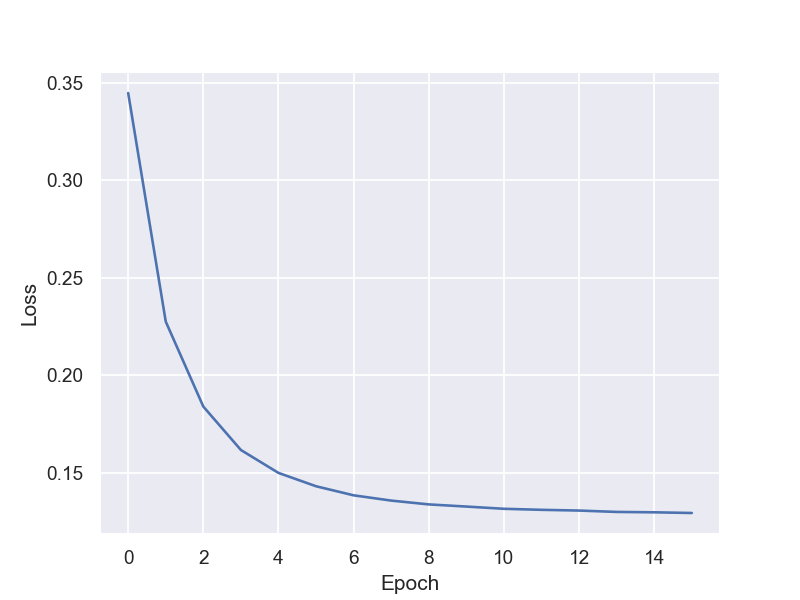

=============== Loss Array ===============
[0.344681 0.227428 0.183827 0.161568 0.149816 0.142971 0.138319 0.13562
 0.133663 0.132557 0.131411 0.130884 0.130505 0.129802 0.129607 0.129254]


In [61]:
c6=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c6_=c6.fit(c6_train_x,c6_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


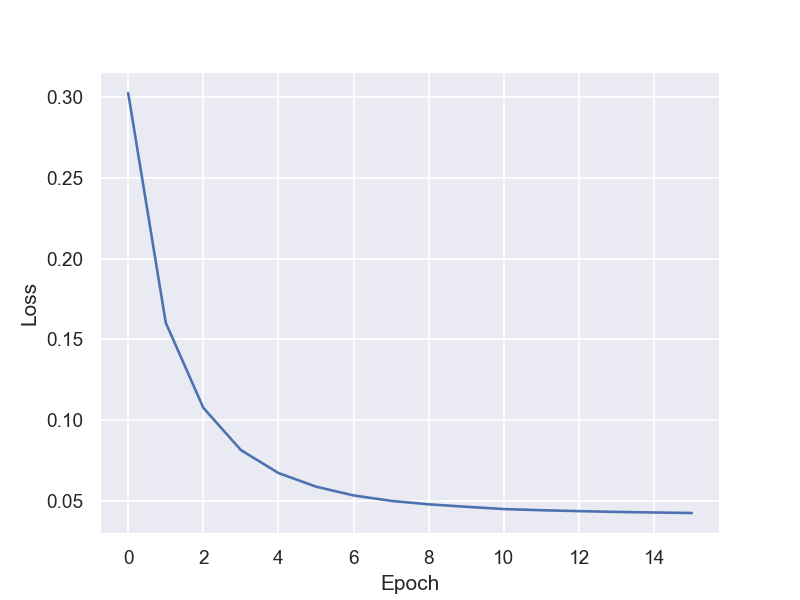

=============== Loss Array ===============
[0.302667 0.160368 0.107643 0.081475 0.067227 0.058808 0.053367 0.049999
 0.047861 0.04634  0.044925 0.044206 0.043647 0.043154 0.042809 0.04249 ]


In [62]:
c7=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c7_=c7.fit(c7_train_x,c7_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


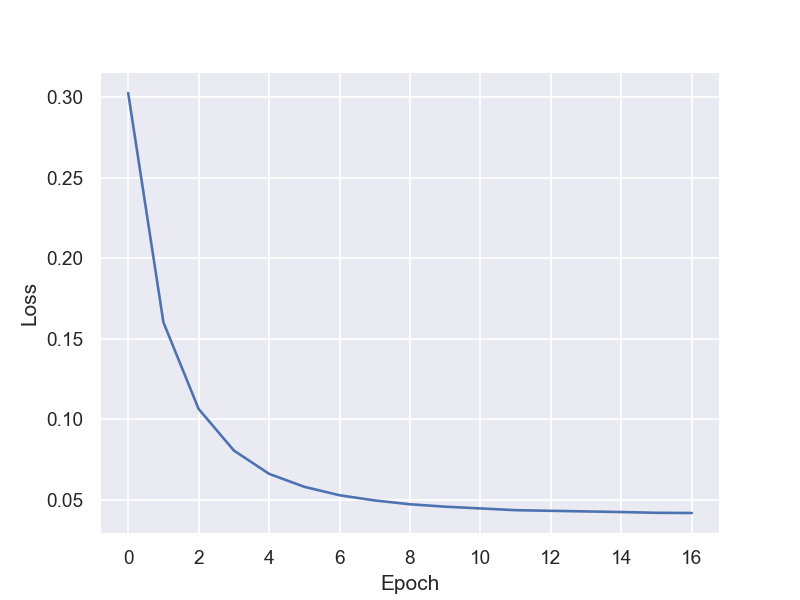

=============== Loss Array ===============
[0.302743 0.16034  0.106498 0.080696 0.066199 0.058148 0.052905 0.049667
 0.047305 0.045803 0.044716 0.043632 0.043233 0.042864 0.042478 0.04199
 0.04188 ]


In [63]:
c8=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c8_=c8.fit(c8_train_x,c8_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


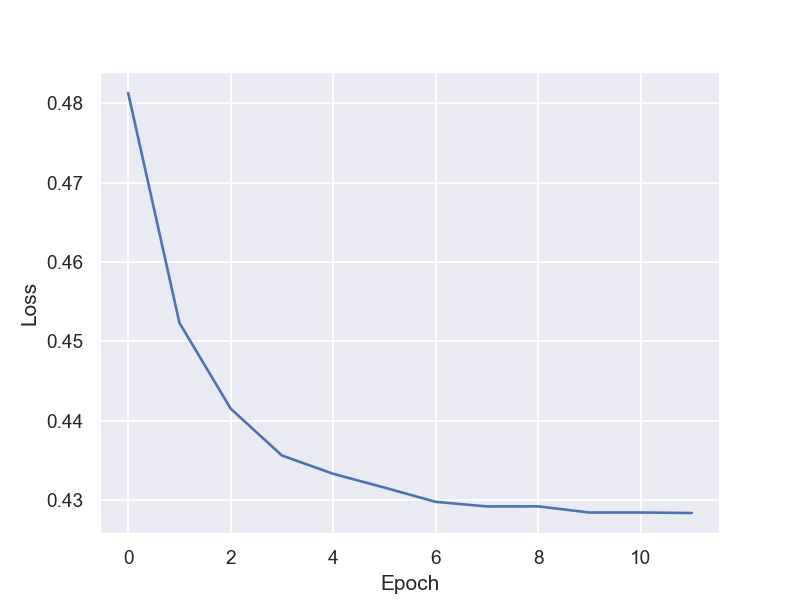

=============== Loss Array ===============
[0.48129  0.452351 0.441543 0.435641 0.433337 0.431601 0.429804 0.429227
 0.429235 0.428459 0.428463 0.428399]


In [64]:
c9=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c9_=c9.fit(c9_train_x,c9_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


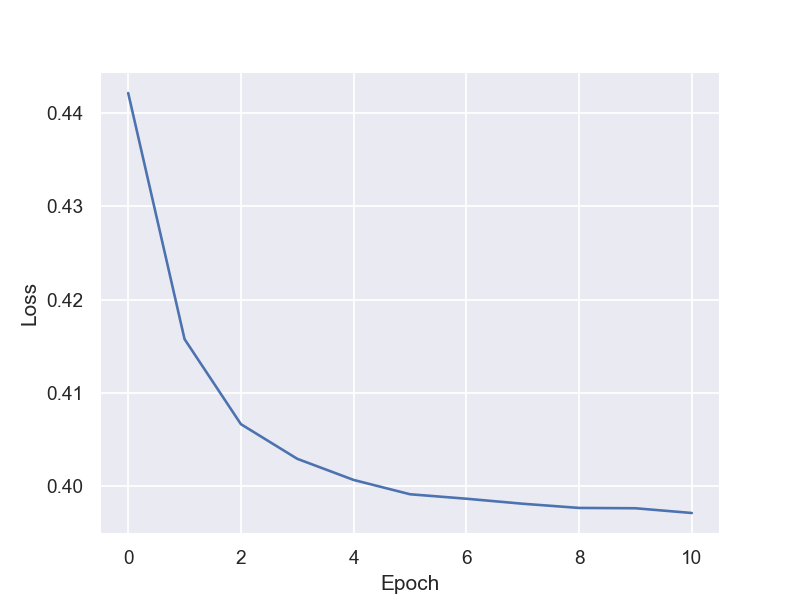

=============== Loss Array ===============
[0.442113 0.415758 0.406652 0.402942 0.40068  0.399147 0.398669 0.398132
 0.397683 0.397648 0.39714 ]


In [65]:
c10=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c10_=c10.fit(c10_train_x,c10_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


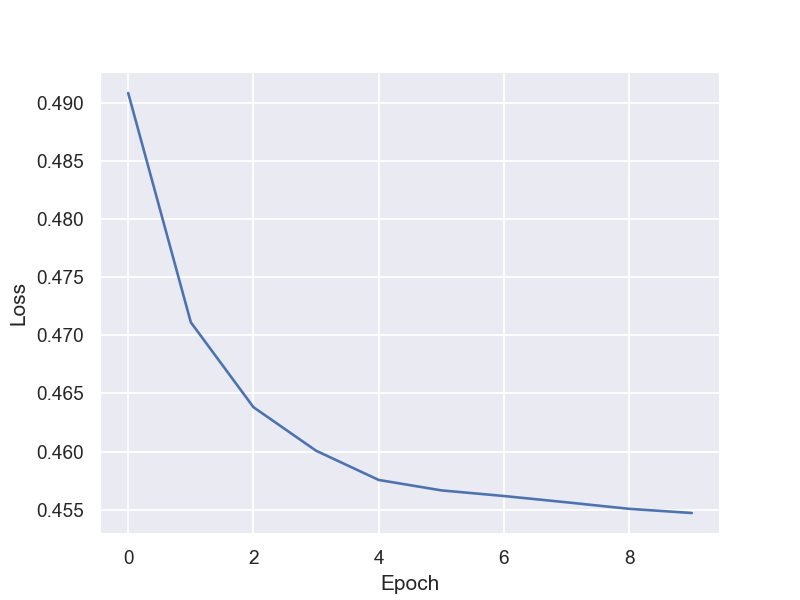

=============== Loss Array ===============
[0.490838 0.471124 0.463823 0.460079 0.457565 0.456668 0.456183 0.455642
 0.45508  0.454723]


In [66]:
c11=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c11_=c11.fit(c11_train_x,c11_train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<IPython.core.display.Javascript object>


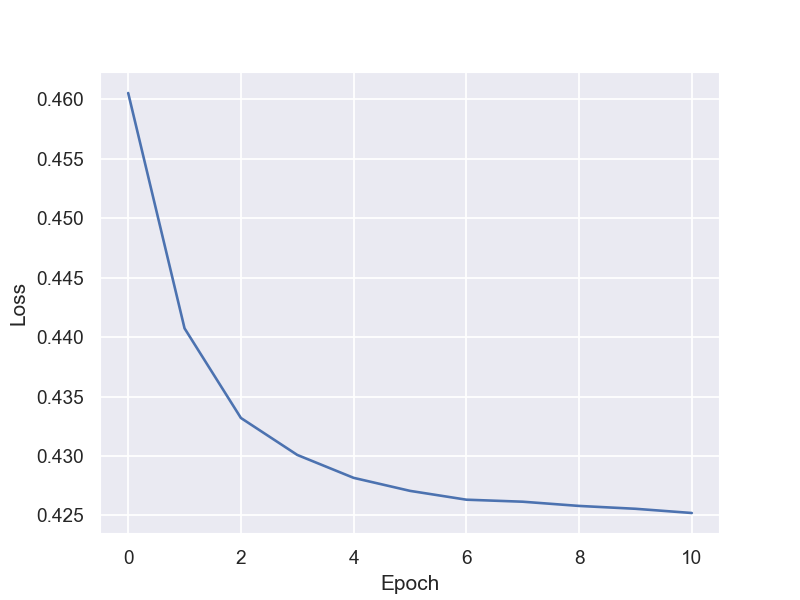

=============== Loss Array ===============
[0.460547 0.440742 0.433197 0.430087 0.428158 0.427063 0.42632  0.42615
 0.425795 0.425555 0.4252  ]


In [67]:
c12=SGDRegressor(alpha=0.1,max_iter=100,verbose=1)
with DisplayLossCurve(print_loss=True,):
    c12_=c12.fit(c12_train_x,c12_train_y)

## testing

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [68]:
c1_test_x,c1_test_y=X_test[['sepal length (cm)']],X_test[['sepal width (cm)']]
c2_test_y,c2_test_x=X_test[['sepal length (cm)']],X_test[['sepal width (cm)']]
c3_test_x,c3_test_y=X_test[['sepal length (cm)']],X_test[['petal width (cm)']]
c4_test_y,c4_test_x=X_test[['sepal length (cm)']],X_test[['petal width (cm)']]
c5_test_x,c5_test_y=X_test[['sepal length (cm)']],X_test[['petal length (cm)']]
c6_test_y,c6_test_x=X_test[['sepal length (cm)']],X_test[['petal length (cm)']]
c7_test_x,c7_test_y=X_test[['petal length (cm)']],X_test[['petal width (cm)']]
c8_test_y,c8_test_x=X_test[['petal length (cm)']],X_test[['petal width (cm)']]
c9_test_x,c9_test_y=X_test[['petal length (cm)']],X_test[['sepal width (cm)']]
c10_test_y,c10_test_x=X_test[['petal length (cm)']],X_test[['sepal width (cm)']]
c11_test_x,c11_test_y=X_test[['petal width (cm)']],X_test[['sepal width (cm)']]
c12_test_y,c12_test_x=X_test[['petal width (cm)']],X_test[['sepal width (cm)']]

In [98]:
score_list=[]
c1_r=c1.predict(c1_test_x)
score_list.append(r2_score(c1_test_y,c1_r))

In [99]:
c2_r=c2.predict(c1_test_x)
score_list.append(r2_score(c2_test_y,c2_r))

In [100]:
c3_r=c3.predict(c3_test_x)
score_list.append(r2_score(c3_test_y,c3_r))

In [101]:
c4_r=c4.predict(c4_test_x)
score_list.append(r2_score(c4_test_y,c4_r))

In [102]:
c5_r=c5.predict(c5_test_x)
score_list.append(r2_score(c5_test_y,c5_r))

In [103]:
c6_r=c6.predict(c6_test_x)
score_list.append(r2_score(c6_test_y,c6_r))

In [104]:
c7_r=c7.predict(c7_test_x)
score_list.append(r2_score(c7_test_y,c7_r))

In [105]:
c8_r=c8.predict(c8_test_x)
score_list.append(r2_score(c8_test_y,c8_r))

In [106]:
c9_r=c9.predict(c9_test_x)
score_list.append(r2_score(c9_test_y,c9_r))

In [107]:
c10_r=c10.predict(c10_test_x)
score_list.append(r2_score(c10_test_y,c10_r))

In [108]:
c11_r=c11.predict(c11_test_x)
score_list.append(r2_score(c1_test_y,c11_r))

In [109]:
c12_r=c12.predict(c12_test_x)
score_list.append(r2_score(c12_test_y,c12_r))

In [110]:
score_list

[-0.057870908958174594,
 -0.5755962737084854,
 0.666210482424503,
 0.6840995903930968,
 0.7909282591498029,
 0.818305895139714,
 0.9311505947397246,
 0.9194323122580149,
 0.3170148627787951,
 -0.019206289284119604,
 0.28251824910759527,
 -0.10624458717323981]

In [125]:
dict_={'model':[1,2,3,4,5,6,7,8,9,10,11,12],'score':score_list}
score_table=pd.DataFrame(dict_)
score_table

,model,score
0,1,-0.057871
1,2,-0.575596
2,3,0.666210
3,4,0.684100
4,5,0.790928
5,6,0.818306
6,7,0.931151
7,8,0.919432
8,9,0.317015
9,10,-0.019206
